In [2]:
import keras
from keras.preprocessing.image import load_img
from keras.applications import DenseNet121
from keras.applications import ResNet50
from keras.applications.densenet import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.densenet import preprocess_input
from keras.applications.densenet import decode_predictions
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from matplotlib import pyplot as plt
from PIL import Image
from PIL import ImageOps
import re, os
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import BatchNormalization
from keras.layers import ReLU
from keras.layers import Dropout
import glob
import numpy as np
import io
from keras.callbacks import ModelCheckpoint


In [117]:
parent_dir = '/Users/Vicente/Downloads/ann/work/Arch/arch_img/'
count = 0
for subdir, dirs, files in os.walk(parent_dir):
    for file in files:
        im = str.lower(file)
        if im.endswith('.jpg'):
            count++
print (count)

20226


In [78]:
# DO NOT RUN (One time process)
# Mirrors all images
parent_dir = '/Users/Vicente/Downloads/ann/work/Arch/arch_img/'
count = 0
for subdir, dirs, files in os.walk(parent_dir):
    for file in files:
        im = str.lower(file)
        if im.endswith('.jpg'):
            temp = os.path.join(parent_dir,subdir)
            image_path= (os.path.join(temp,im))
            im = Image.open(image_path) 
            imf = ImageOps.mirror(im)
            nojpg = image_path[:-4]
            new_path = (nojpg + "_mirror.jpg")
            print (new_path)
            imf.save(new_path, "JPEG")

/Users/Vicente/Downloads/ann/work/Arch/arch_img/Palladian architecture/011063_mirror.jpg
/Users/Vicente/Downloads/ann/work/Arch/arch_img/Palladian architecture/011077_mirror.jpg
/Users/Vicente/Downloads/ann/work/Arch/arch_img/Palladian architecture/5044_792px-france_arc_et_senas_saline_royal_main_building_1_mirror.jpg
/Users/Vicente/Downloads/ann/work/Arch/arch_img/Palladian architecture/83_800px-istana_kampong_glam_mirror.jpg
/Users/Vicente/Downloads/ann/work/Arch/arch_img/Palladian architecture/3023_800px-ish_wc_washingtondc1_mirror.jpg
/Users/Vicente/Downloads/ann/work/Arch/arch_img/Palladian architecture/011507_mirror.jpg
/Users/Vicente/Downloads/ann/work/Arch/arch_img/Palladian architecture/011513_mirror.jpg
/Users/Vicente/Downloads/ann/work/Arch/arch_img/Palladian architecture/011249_mirror.jpg
/Users/Vicente/Downloads/ann/work/Arch/arch_img/Palladian architecture/011329_mirror.jpg
/Users/Vicente/Downloads/ann/work/Arch/arch_img/Palladian architecture/1391_bush_inauguration_2005_

In [5]:
model = DenseNet121(weights='imagenet', include_top=False, input_shape = [128,128,3])
for layer in model.layers:
    layer.trainable = False
for layer in model.layers[-100:]:
    layer.trainable = True
flat1 = Flatten()(model.layers[-1].output)
D1 = Dense(32, activation='relu')(flat1)
B3 = BatchNormalization()(D1)
R2 = ReLU()(B3)
Dr2 = Dropout(0.5)(R2)
D3 = Dense(32, activation='relu')(Dr2)
B2 = BatchNormalization()(D3)
output = Dense(25, activation='softmax')(B2)
model = Model(inputs=model.inputs, outputs=output)
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 64, 64, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1/conv[0][0]                 
_______________________________________________________________________________________

In [5]:
parent_dir = '/Users/Vicente/Downloads/ann/work/Arch/arch_img/'
for subdir, dirs, files in os.walk(parent_dir):
    print (subdir)

/Users/Vicente/Downloads/ann/work/Arch/arch_img/
/Users/Vicente/Downloads/ann/work/Arch/arch_img/Palladian architecture
/Users/Vicente/Downloads/ann/work/Arch/arch_img/Novelty architecture
/Users/Vicente/Downloads/ann/work/Arch/arch_img/International style
/Users/Vicente/Downloads/ann/work/Arch/arch_img/Chicago school architecture
/Users/Vicente/Downloads/ann/work/Arch/arch_img/Beaux-Arts architecture
/Users/Vicente/Downloads/ann/work/Arch/arch_img/Ancient Egyptian architecture
/Users/Vicente/Downloads/ann/work/Arch/arch_img/Gothic architecture
/Users/Vicente/Downloads/ann/work/Arch/arch_img/Tudor Revival architecture
/Users/Vicente/Downloads/ann/work/Arch/arch_img/Romanesque architecture
/Users/Vicente/Downloads/ann/work/Arch/arch_img/Colonial architecture
/Users/Vicente/Downloads/ann/work/Arch/arch_img/American craftsman style
/Users/Vicente/Downloads/ann/work/Arch/arch_img/Greek Revival architecture
/Users/Vicente/Downloads/ann/work/Arch/arch_img/Queen Anne architecture
/Users/Vicen

In [19]:
catagories={'Palladian architecture' :0,
            'Novelty architecture':1, 
            'International style' :2, 
            'Chicago school architecture':3, 
            'Beaux-Arts architecture':4, 
            'Ancient Egyptian architecture':5, 
            'Gothic architecture':6, 
            'Tudor Revival architecture':7,
            'Romanesque architecture':8, 
            'Colonial architecture':9, 
            'American craftsman style':10, 
            'Greek Revival architecture':11, 
            'Queen Anne architecture':12, 
            'Baroque architecture':13, 
            'Edwardian architecture':14, 
            'Art Nouveau architecture':15, 
            'Deconstructivism':16, 
            'Bauhaus architecture':17, 
            'Georgian architecture':18, 
            'Byzantine architecture':19, 
            'Postmodern architecture':20, 
            'Achaemenid architecture':21, 
            'Art Deco architecture':22, 
            'American Foursquare architecture':23, 
            'Russian Revival architecture':24}
print(type(catagories))

<class 'dict'>


In [93]:
all_img_paths = glob.glob(os.path.join(parent_dir, '*.jpg'))
parent_dir = '/Users/Vicente/Downloads/ann/work/Arch/arch_img/'
for subdir, dirs, files in os.walk(parent_dir):
    for file in files:
        im = str.lower(file)
        if im.endswith('.jpg'):
            temp = os.path.join(parent_dir,subdir)
            image_path= (os.path.join(temp,im))
            all_img_paths.append(image_path)
print (len(all_img_paths))
print (all_img_paths)


20226
['/Users/Vicente/Downloads/ann/work/Arch/arch_img/Palladian architecture/011063.jpg', '/Users/Vicente/Downloads/ann/work/Arch/arch_img/Palladian architecture/011408_mirror.jpg', '/Users/Vicente/Downloads/ann/work/Arch/arch_img/Palladian architecture/011077.jpg', '/Users/Vicente/Downloads/ann/work/Arch/arch_img/Palladian architecture/011117_mirror.jpg', '/Users/Vicente/Downloads/ann/work/Arch/arch_img/Palladian architecture/5044_792px-france_arc_et_senas_saline_royal_main_building_1.jpg', '/Users/Vicente/Downloads/ann/work/Arch/arch_img/Palladian architecture/011249_mirror.jpg', '/Users/Vicente/Downloads/ann/work/Arch/arch_img/Palladian architecture/83_800px-istana_kampong_glam.jpg', '/Users/Vicente/Downloads/ann/work/Arch/arch_img/Palladian architecture/3023_800px-ish_wc_washingtondc1.jpg', '/Users/Vicente/Downloads/ann/work/Arch/arch_img/Palladian architecture/011507.jpg', '/Users/Vicente/Downloads/ann/work/Arch/arch_img/Palladian architecture/011617_mirror.jpg', '/Users/Vicente

In [8]:
#runs 

IMG_SIZE_X = 128
IMG_SIZE_Y = 128
IMAGE_SIZE = 128
IMAGE_CHANNELS = 3

all_img_paths = glob.glob(os.path.join(parent_dir, '*.jpg'))
parent_dir = '/Users/Vicente/Downloads/ann/work/Arch/arch_img/'
for subdir, dirs, files in os.walk(parent_dir):
    for file in files:
        im = str.lower(file)
        if im.endswith('.jpg'):
            temp = os.path.join(parent_dir,subdir)
            image_path= (os.path.join(temp,im))
            all_img_paths.append(image_path)

sample_img_paths = all_img_paths[0:5000]

#np.random.shuffle(all_img_paths)
final = []
count = 0
# SWITCH TO ALL IMAGES WHEN READY
#could use preprocess_img to not have to use list
for img_path in all_img_paths:
    print(img_path)
    image = Image.open(img_path).resize((IMAGE_SIZE, IMAGE_SIZE)).convert('RGB')
    image = np.asarray(image)
    image = np.reshape(image, (128,128,3))
    print (image.shape)
    #Try with one image. Reshape tries to put it in the shape given. 
    #Make list of arrays into one big array
    final.append(np.asarray(image))
    count ++
    print (count)
    
print ("DONE WITH ADDING")
print (type(final))
final = np.reshape(final,(-1, IMAGE_SIZE, IMAGE_SIZE, IMAGE_CHANNELS))
print ("DONE RESHAPING")
print (type(final))
final = final / 127.5 - 1
print (final.shape)
print (final.size)
print (len(final))


np.save('Final.npy', final)


/Users/Vicente/Downloads/ann/work/Arch/arch_img/Palladian architecture/011063.jpg
(128, 128, 3)
1
/Users/Vicente/Downloads/ann/work/Arch/arch_img/Palladian architecture/011408_mirror.jpg
(128, 128, 3)
2
/Users/Vicente/Downloads/ann/work/Arch/arch_img/Palladian architecture/011077.jpg
(128, 128, 3)
3
/Users/Vicente/Downloads/ann/work/Arch/arch_img/Palladian architecture/011117_mirror.jpg
(128, 128, 3)
4
/Users/Vicente/Downloads/ann/work/Arch/arch_img/Palladian architecture/5044_792px-france_arc_et_senas_saline_royal_main_building_1.jpg
(128, 128, 3)
5
/Users/Vicente/Downloads/ann/work/Arch/arch_img/Palladian architecture/011249_mirror.jpg
(128, 128, 3)
6
/Users/Vicente/Downloads/ann/work/Arch/arch_img/Palladian architecture/83_800px-istana_kampong_glam.jpg
(128, 128, 3)
7
/Users/Vicente/Downloads/ann/work/Arch/arch_img/Palladian architecture/3023_800px-ish_wc_washingtondc1.jpg
(128, 128, 3)
8
/Users/Vicente/Downloads/ann/work/Arch/arch_img/Palladian architecture/011507.jpg
(128, 128, 3)

In [16]:
#Convert catagory of Arch Data into Numbers
cat_list = []
for img_path in all_img_paths:
    for key in catagories.keys():
        if (img_path.find(key) != -1):
            cat_list.append(catagories[key])
print (cat_list)
print (len(cat_list))


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [9]:
#SWITCH TO y_raw
#One hot encodes the catagory matrix
y_raw = np.asarray(cat_list)
num_classes = len(set(y_raw))
ytry = keras.utils.to_categorical(y_raw, num_classes)
print (len(ytry))
print (ytry)
np.save('YSave',ytry)


20226
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [19]:
#Run to split test data
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
x_raw, X_test, y_try, y_test = train_test_split(x_raw, ytry, test_size=0.20, shuffle = True)


In [21]:
#Save all current data
np.save('final.npy',x_raw)
print('finished')
np.save('y_try.npy', y_try)
print('finished')
np.save('X_test.npy', X_test)
print('finished')
np.save('y_test.npy', y_test)
print('finished')

finished
finished
finished
finished


In [ ]:
#Use if just starting 
x_raw = np.load('final.npy')



In [ ]:
#Use if already running Final from before
x_raw = final

In [19]:
y_try = np.load("y_try.npy")

In [13]:
#Set batchsize and epochs
batch_size = 32
epochs = 3

In [23]:
#compile and run model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
hist = model.fit(x_raw, y_try, batch_size=batch_size, epochs=epochs, validation_split=0.1, shuffle = True)
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/3
456/456 [==============================] - 852s 2s/step - loss: 1.3882 - accuracy: 0.5620 - val_loss: 0.9968 - val_accuracy: 0.7058
Epoch 2/3
456/456 [==============================] - 758s 2s/step - loss: 1.2436 - accuracy: 0.6030 - val_loss: 0.9344 - val_accuracy: 0.7281
Epoch 3/3
456/456 [==============================] - 756s 2s/step - loss: 1.1166 - accuracy: 0.6378 - val_loss: 0.9715 - val_accuracy: 0.7108
Test loss: 0.984735906124115
Test accuracy: 0.7115669846534729


In [15]:
#Evaluate on test data
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.1684972047805786
Test accuracy: 0.651260495185852


In [185]:
#saves model
model.save("testmodel")
print ("finished")

finished


In [13]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_raw, y_train, test_size=0.20, shuffle = True)


{'val_loss': [1.9899252247898775, 2.3093211692107474, 2.4616898320366634, 2.4162561525078434, 2.0412570610918723], 'val_accuracy': [0.45488256216049194, 0.4616810977458954, 0.4678615629673004, 0.5030902624130249, 0.538318932056427], 'loss': [1.9089398276034726, 1.2087055352539369, 0.866733895767981, 0.6374853869221921, 0.4782304873490723], 'accuracy': [0.43922538, 0.6282104, 0.7332097, 0.803255, 0.85091335]}
dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


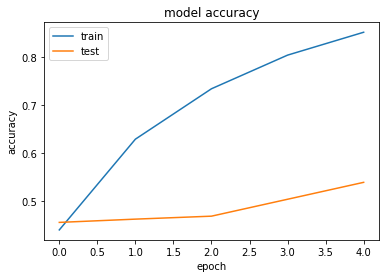

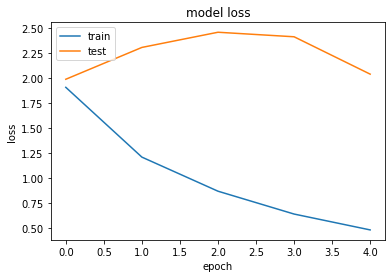

In [197]:
print (hist.history)
print(hist.history.keys())
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
#undo the onehot encoding
from numpy import argmax
arg = (argmax((y_test),axis=1))
y_test_cat = []
for num in arg:
    y_test_cat.append(num)


In [21]:
#Calls the model on raw test images and ranks which prediction was correct. 1 = first, 5 = fifth etc.

#Take in Y test
total = []
count = 0
pre1 = []
# Take in raw images
code = 0
i = 0
pre = []
while i < 25:
    pre.append(i)
    i++
for key in catagories.keys():
    for value in pre:
        if catagories[key] == value:
            pre1.append(key)
for image in x_test:
    print (count)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    yhat = model.predict(image)
    yhat1 = yhat * 1000
    predictzip = zip(yhat[0],pre1)
    predictset = set(predictzip)
    sortedpre = (sorted(predictset))
    top5 = sortedpre[-5:]
    val = y_test_cat[count]
    guess = 6
    for key in catagories.keys():
        if catagories[key] == val:
            for tup in top5:
                guess--
                if tup[1] == key:
                    total.append(guess)
    count +=1

print (total)
                
                


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [22]:
#print percentage of model accuracy depending on how many different predicitons you consider.
print (len(total))
lentotal= len(total)
fifth = total.count(5)
print (fifth)
fourth = total.count(4)
print (fourth)
third = total.count(3)
print (third)
sec = total.count(2)
print (sec)
one = total.count(1)
print (one)
top5count = (one + sec + third + fourth+fifth)/lentotal
print("top5count is equal to:" + top5count)
top3count = (one + sec + third)/lentotal
print ("top3count is equal to:" + top3count)
print ("top3count is equal to:" + (one/lentotal))


3740
113
141
262
589
2635
1.0
0.9320855614973262
0.7045454545454546


In [3]:
#load the data 
x_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')
x_raw = np.load("final.npy")
y_try = np.load("y_try.npy")

In [ ]:
import sklearn.metrics as metrics

y_pred_ohe = model.predict(x_test)  # shape=(n_samples, 12)
y_pred_labels = np.argmax(y_pred_ohe, axis=1)  # only necessary if output has one-hot-encoding, shape=(n_samples)

confusion_matrix = metrics.confusion_matrix(y_true=y_test_cat, y_pred=y_pred_labels)  # shape=(12, 12)

In [27]:
print (confusion_matrix)

[[ 81   0   0   0   3   1   0   0   0   5   0  17   0   2   1   0   0   0
   13   0   0   1   0   1   0]
 [  0 142   1   1   0   0   0   0   0   0   0   1   0   0   0   0  10   0
    0   0   9   0   0   0   0]
 [  0   0 131   2   0   0   0   0   0   0   1   0   0   0   0   1   0  28
    0   0   5   0   0   1   0]
 [  0   0   7  78   6   0   0   0   0   0   1   0   0   0   0   1   0   1
    0   0   3   0   2   0   0]
 [  6   0   1  15  88   0   0   0   0   5   0  21   2   4   0  14   0   1
    7   1   1   0  13   1   0]
 [  0   0   0   0   0 155   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   8   0   0   0]
 [  0   0   0   0   1   2 125   0  11   1   2   0   0   0   0   0   0   0
    0   0   3   2   0   0   0]
 [  0   0   0   1   1   0   0 153   0   5  10   1   7   0   8   1   0   2
    5   0   0   0   2   1   0]
 [  3   0   0   0   1   0   3   2  80   9   0   0   1   2   1   0   0   0
    0  16   3   6   0   0   2]
 [ 18   1   3   0   9   0   0   6   0  91   5  14   5  

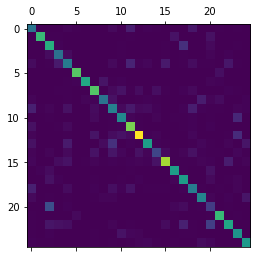

In [28]:
import pylab as pl

pl.matshow(confusion_matrix)
pl.show()


In [1]:
#This does work but you have to have already run different cells. I do not want to have to load up final.py again. 6gb of data
from sklearn.metrics import classification_report
print(classification_report(y_test_cat, y_pred_labels))


NameError: name 'y_test_cat' is not defined